## NLTK, Spacy and Gensim Tutorial

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import gensim
import scipy
import numpy
import json
import nltk
import sys
import csv
import os

In [3]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline

In [4]:
print(os.listdir('./pronoun'))

['test_stage_2.tsv', 'test_stage_1.tsv', 'sample_submission_stage_1.csv', 'sample_submission_stage_2.csv']


In [5]:
pronoun_df = pd.read_csv('./pronoun/test_stage_1.tsv', delimiter='\t')
pronoun_df.shape

(2000, 9)

In [6]:
pronoun_df.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera


In [7]:
pronoun_df.describe()

,Pronoun-offset,A-offset,B-offset
count,2000.000000,2000.00000,2000.000000
mean,324.963500,239.77800,300.535500
std,98.788591,111.15768,113.226357
min,3.000000,0.00000,16.000000
25%,274.000000,179.75000,237.000000
50%,316.000000,239.00000,294.000000
75%,370.000000,301.25000,358.000000
max,1135.000000,971.00000,1098.000000


In [8]:
pronoun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
ID                2000 non-null object
Text              2000 non-null object
Pronoun           2000 non-null object
Pronoun-offset    2000 non-null int64
A                 2000 non-null object
A-offset          2000 non-null int64
B                 2000 non-null object
B-offset          2000 non-null int64
URL               2000 non-null object
dtypes: int64(3), object(6)
memory usage: 140.7+ KB


In [9]:
pronoun_df.columns

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'B',
       'B-offset', 'URL'],
      dtype='object')

In [10]:
submission_df = pd.read_csv('./pronoun/sample_submission_stage_1.csv', delimiter='\t')
submission_df.shape

(2000, 1)

In [11]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        # written by MJ Bahmani
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [12]:
check_missing_data(pronoun_df)

False

In [13]:
pronoun_df['num_words'] = pronoun_df['Text'].apply(lambda x: len(str(x).split()))

In [14]:
pronoun_df['num_words'].max()

204

In [15]:
pronoun_df['num_words'].min()

16

In [16]:
# unique words

pronoun_df['unique_words'] = pronoun_df['Text'].apply(lambda x: len(set(str(x).split())))

print("Maxixmum of unique words in train: ", pronoun_df['unique_words'].max())
print("Mean of unique words in train: ", pronoun_df['unique_words'].min())

Maxixmum of unique words in train:  136
Mean of unique words in train:  16


In [17]:
#number of characters
pronoun_df['num_chars'] = pronoun_df['Text'].apply(lambda x: len(str(x).split()))

pronoun_df['num_chars'].max()

204

In [18]:
# number of stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [19]:
pronoun_df['stopwords'] = pronoun_df['Text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))

In [20]:
pronoun_df['stopwords'].max()

88

In [21]:
# number of punctuations
import string
pronoun_df['punctuations'] = pronoun_df['Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
pronoun_df['punctuations'].max()

93

In [22]:
# number of title case words
pronoun_df['upper_case'] = pronoun_df['Text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
pronoun_df['upper_case'].max()

11

In [23]:
print(pronoun_df.columns)
pronoun_df.head(1)

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'B',
       'B-offset', 'URL', 'num_words', 'unique_words', 'num_chars',
       'stopwords', 'punctuations', 'upper_case'],
      dtype='object')


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL,num_words,unique_words,num_chars,stopwords,punctuations,upper_case
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...,74,61,74,29,14,0


In [24]:
pronoun = pronoun_df['Pronoun']

In [25]:
np.unique(pronoun)

array(['He', 'Her', 'His', 'She', 'he', 'her', 'him', 'his', 'she'],
      dtype=object)

In [26]:
binary = {
    "He": 0,
    "he": 0,
    "She": 1,
    "she": 1,
    "His": 2,
    "his": 2,
    "Him": 3,
    "him": 3,
    "Her": 4,
    "her": 4
}
for index in range(len(pronoun_df)):
    key = pronoun_df.iloc[index]['Pronoun']
    pronoun_df.at[index, 'Pronoun_binary'] = binary[key]
pronoun_df.head(10)

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL,num_words,unique_words,num_chars,stopwords,punctuations,upper_case,Pronoun_binary
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...,74,61,74,29,14,0,4.0
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie,65,58,65,22,12,0,2.0
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...,95,71,95,39,16,0,2.0
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band),69,58,69,24,13,1,2.0
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera,112,80,112,43,18,1,1.0
5,development-6,Sandra Collins is an American DJ. She got her ...,She,411,Collins,236,DJ,347,http://en.wikipedia.org/wiki/Sandra_Collins,81,64,81,31,13,4,1.0
6,development-7,Reb Chaim Yaakov's wife is the sister of Rabbi...,his,273,Reb Asher,152,Akiva Eiger,253,http://en.wikipedia.org/wiki/Asher_Arieli,72,48,72,27,11,0,2.0
7,development-8,Slant Magazine's Sal Cinquemani viewed the alb...,his,337,Greg Kot,173,Robert Christgau,377,http://en.wikipedia.org/wiki/The_Truth_About_L...,71,60,71,26,21,0,2.0
8,development-9,Her father was an Englishman ``of rank and cul...,her,246,Mary Paine,255,Kelsey,267,http://en.wikipedia.org/wiki/Mary_S._Peake,53,42,53,23,13,0,4.0
9,development-10,Shaftesbury's UK partners in the production of...,she,329,Christina Jennings,196,Kirstine Stewart,226,http://en.wikipedia.org/wiki/Murdoch_Mysteries,52,45,52,16,14,4,1.0


In [27]:
from wordcloud import WordCloud as wc

In [28]:
def generate_wordcloud(text):
    wordcloud = wc(relative_scaling=0.1, stopwords=stopwords).generate(text)
    fig,ax = plt.subplots(1,1, figsize=(15,15))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.margins(x=0, y=0)
    plt.show()

In [29]:
text = ' '.join(pronoun_df.Text)

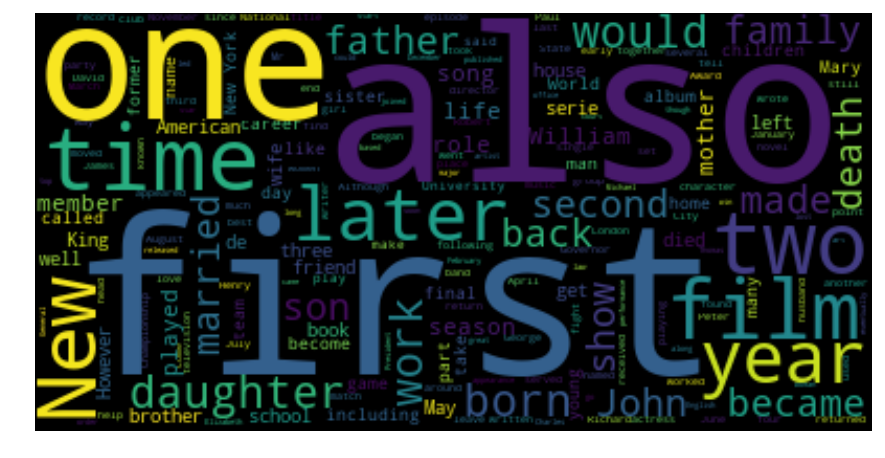

In [30]:
generate_wordcloud(text)

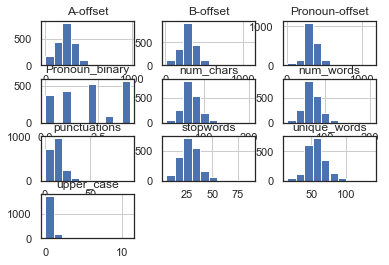

In [31]:
pronoun_df.hist();

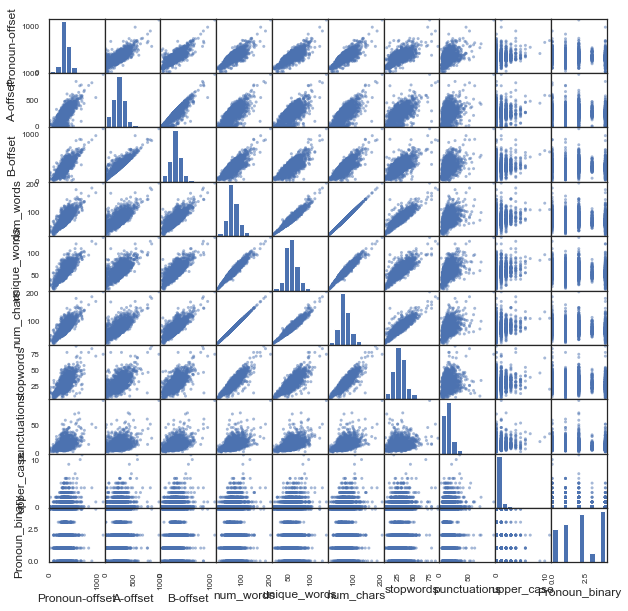

<Figure size 432x288 with 0 Axes>

In [32]:
pd.plotting.scatter_matrix(pronoun_df, figsize=(10,10))
plt.figure();

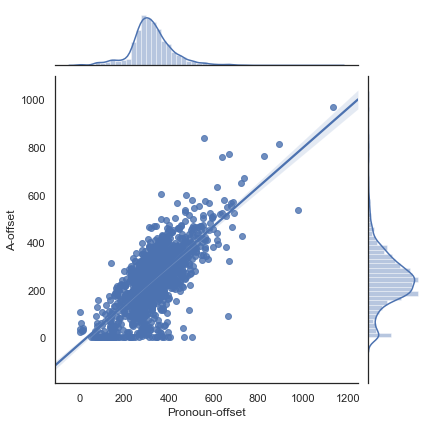

In [33]:
sns.jointplot(x='Pronoun-offset', y='A-offset', data=pronoun_df, kind='reg');

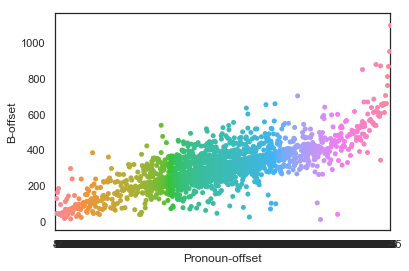

In [34]:
sns.swarmplot(x='Pronoun-offset', y='B-offset', data=pronoun_df);

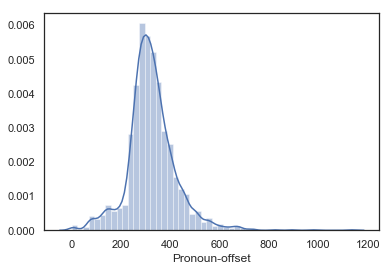

In [35]:
sns.distplot(pronoun_df['Pronoun-offset']);

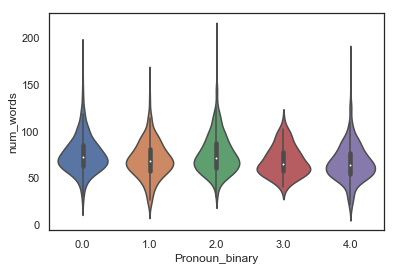

In [36]:
sns.violinplot(data=pronoun_df,x="Pronoun_binary", y="num_words");

### NLTK

In [37]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [38]:
pronoun_df.Text[0]

"Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."

In [39]:
sample_text = pronoun_df.Text[0]

In [40]:
print(word_tokenize(sample_text))

['Zoe', 'Telford', '--', 'played', 'the', 'police', 'officer', 'girlfriend', 'of', 'Simon', ',', 'Maggie', '.', 'Dumped', 'by', 'Simon', 'in', 'the', 'final', 'episode', 'of', 'series', '1', ',', 'after', 'he', 'slept', 'with', 'Jenny', ',', 'and', 'is', 'not', 'seen', 'again', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'and', 'also', 'a', 'year', '11', 'pupil', 'in', 'Simon', "'s", 'class', '.', 'Dumped', 'her', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'after', 'he', 'would', "n't", 'have', 'sex', 'with', 'her', 'but', 'later', 'realised', 'this', 'was', 'due', 'to', 'him', 'catching', 'crabs', 'off', 'her', 'friend', 'Pauline', '.']


In [41]:
print(sent_tokenize(sample_text))

['Zoe Telford -- played the police officer girlfriend of Simon, Maggie.', 'Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again.', "Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class.", "Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."]


In [42]:
words = word_tokenize(sample_text)
filterd_words = []

for word in words:
    if word not in stopwords:
        filterd_words.append(word)
        
print(filterd_words)

['Zoe', 'Telford', '--', 'played', 'police', 'officer', 'girlfriend', 'Simon', ',', 'Maggie', '.', 'Dumped', 'Simon', 'final', 'episode', 'series', '1', ',', 'slept', 'Jenny', ',', 'seen', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'also', 'year', '11', 'pupil', 'Simon', "'s", 'class', '.', 'Dumped', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'would', "n't", 'sex', 'later', 'realised', 'due', 'catching', 'crabs', 'friend', 'Pauline', '.']


In [43]:
# NLTK Stemming

from nltk.stem import PorterStemmer

In [44]:
ps = PorterStemmer()

for word in word_tokenize(sample_text):
    print(ps.stem(word))

zoe
telford
--
play
the
polic
offic
girlfriend
of
simon
,
maggi
.
dump
by
simon
in
the
final
episod
of
seri
1
,
after
he
slept
with
jenni
,
and
is
not
seen
again
.
phoeb
thoma
play
cheryl
cassidi
,
paulin
's
friend
and
also
a
year
11
pupil
in
simon
's
class
.
dump
her
boyfriend
follow
simon
's
advic
after
he
would
n't
have
sex
with
her
but
later
realis
thi
wa
due
to
him
catch
crab
off
her
friend
paulin
.


In [45]:
# Speech Tagging
from nltk.tokenize import PunktSentenceTokenizer

sentences = nltk.sent_tokenize(sample_text)
for sent in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[('Zoe', 'NNP'), ('Telford', 'NNP'), ('--', ':'), ('played', 'VBD'), ('the', 'DT'), ('police', 'NN'), ('officer', 'NN'), ('girlfriend', 'NN'), ('of', 'IN'), ('Simon', 'NNP'), (',', ','), ('Maggie', 'NNP'), ('.', '.')]
[('Dumped', 'VBN'), ('by', 'IN'), ('Simon', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('final', 'JJ'), ('episode', 'NN'), ('of', 'IN'), ('series', 'NN'), ('1', 'CD'), (',', ','), ('after', 'IN'), ('he', 'PRP'), ('slept', 'VBD'), ('with', 'IN'), ('Jenny', 'NNP'), (',', ','), ('and', 'CC'), ('is', 'VBZ'), ('not', 'RB'), ('seen', 'VBN'), ('again', 'RB'), ('.', '.')]
[('Phoebe', 'NNP'), ('Thomas', 'NNP'), ('played', 'VBD'), ('Cheryl', 'NNP'), ('Cassidy', 'NNP'), (',', ','), ('Pauline', 'NNP'), ("'s", 'POS'), ('friend', 'NN'), ('and', 'CC'), ('also', 'RB'), ('a', 'DT'), ('year', 'NN'), ('11', 'CD'), ('pupil', 'NN'), ('in', 'IN'), ('Simon', 'NNP'), ("'s", 'POS'), ('class', 'NN'), ('.', '.')]
[('Dumped', 'NNP'), ('her', 'PRP$'), ('boyfriend', 'NN'), ('following', 'VBG'), ('Simon', 'N

In [46]:
# Filter based on type of words

from nltk.corpus import state_union

data = []

for sent in sentences:
    data = data + nltk.pos_tag(nltk.word_tokenize(sent))
    
for word in data:
    if 'NNP' in word[1]:
        print(word)

('Zoe', 'NNP')
('Telford', 'NNP')
('Simon', 'NNP')
('Maggie', 'NNP')
('Simon', 'NNP')
('Jenny', 'NNP')
('Phoebe', 'NNP')
('Thomas', 'NNP')
('Cheryl', 'NNP')
('Cassidy', 'NNP')
('Pauline', 'NNP')
('Simon', 'NNP')
('Dumped', 'NNP')
('Simon', 'NNP')
('Pauline', 'NNP')


#### NLTK Prediction
Given a name, the classifier will predict if it’s a male or female.

In [47]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [48]:
from nltk.corpus import names

# Load data and training 
names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])

In [49]:
def gender_feature(word):
    return {'last_letter': word[-1]}

In [50]:
# Training and Prediction

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def gender_features(word): 
    return {'last_letter': word[-1]} 
 
# Load data and training 
names = ([(name, 'male') for name in names.words('male.txt')] + 
	 [(name, 'female') for name in names.words('female.txt')])
 
featuresets = [(gender_features(n), g) for (n,g) in names] 
train_set = featuresets
classifier = nltk.NaiveBayesClassifier.train(train_set) 
 
# Predict
print(classifier.classify(gender_features('Elektra')))

female


## Spacy

In [51]:
import spacy

In [57]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(sample_text)
i=0
for token in doc:
    i=i+1;
    if i<20:
        print('"' + token.text + '"')

"Zoe"
"Telford"
"--"
"played"
"the"
"police"
"officer"
"girlfriend"
"of"
"Simon"
","
"Maggie"
"."
"Dumped"
"by"
"Simon"
"in"
"the"
"final"


In [58]:
# sentence detection
i=0
for sent in doc.sents:
    i=i+1;
    print(i,'-',sent)

1 - Zoe Telford -- played the police officer girlfriend of Simon, Maggie.
2 - Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again.
3 - Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class.
4 - Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline.


In [59]:
# part of speech tagging
print([(token, token.tag_) for token in doc] )

[(Zoe, 'NNP'), (Telford, 'NNP'), (--, ':'), (played, 'VBD'), (the, 'DT'), (police, 'NN'), (officer, 'NN'), (girlfriend, 'NN'), (of, 'IN'), (Simon, 'NNP'), (,, ','), (Maggie, 'NNP'), (., '.'), (Dumped, 'VBN'), (by, 'IN'), (Simon, 'NNP'), (in, 'IN'), (the, 'DT'), (final, 'JJ'), (episode, 'NN'), (of, 'IN'), (series, 'NNP'), (1, 'NNP'), (,, ','), (after, 'IN'), (he, 'PRP'), (slept, 'VBD'), (with, 'IN'), (Jenny, 'NNP'), (,, ','), (and, 'CC'), (is, 'VBZ'), (not, 'RB'), (seen, 'VBN'), (again, 'RB'), (., '.'), (Phoebe, 'NNP'), (Thomas, 'NNP'), (played, 'VBD'), (Cheryl, 'NNP'), (Cassidy, 'NNP'), (,, ','), (Pauline, 'NNP'), ('s, 'POS'), (friend, 'NN'), (and, 'CC'), (also, 'RB'), (a, 'DT'), (year, 'NN'), (11, 'CD'), (pupil, 'NN'), (in, 'IN'), (Simon, 'NNP'), ('s, 'POS'), (class, 'NN'), (., '.'), (Dumped, 'VBD'), (her, 'PRP$'), (boyfriend, 'NN'), (following, 'VBG'), (Simon, 'NNP'), ('s, 'POS'), (advice, 'NN'), (after, 'IN'), (he, 'PRP'), (would, 'MD'), (n't, 'RB'), (have, 'VB'), (sex, 'NN'), (with

In [60]:
# named entity recognition
for ent in doc.ents:
    print(ent.text, ent.label_)

Zoe Telford PERSON
Simon PERSON
Maggie PERSON
Simon PERSON
Jenny PERSON
Phoebe Thomas PERSON
Cheryl Cassidy PERSON
Pauline PERSON
a year 11 DATE
Simon PERSON
Simon PERSON
Pauline PERSON


In [61]:
from spacy import displacy

displacy.render(doc, style='ent', jupyter=True)

## Gensim

Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community

In [62]:
import gensim
from gensim import corpora
from pprint import pprint

In [63]:
# create dictionary from a list of sentences
documents = [" Zoe Telford  played the police officer girlfriend of Simon, Maggie.",
             "Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again.",
             "Phoebe Thomas played Cheryl Cassidy, Paulines friend and also a year 11 pupil in Simons class.", 
             "Dumped her boyfriend following Simons advice after he wouldnt ",
             "have sex with her but later realised this was due to him catching crabs off her friend Pauline."]

documents_2 = ["One source says the report will likely conclude that", 
                "the operation was carried out without clearance and", 
                "transparency and that those involved will be held", 
                "responsible. One of the sources acknowledged that the", 
                "report is still being prepared and cautioned that", 
                "things could change."]

In [64]:
# tokenize
texts = [[text for text in doc.split()] for doc in documents]

dictionay = corpora.Dictionary(texts)

print(dictionay)

Dictionary(60 unique tokens: ['Maggie.', 'Simon,', 'Telford', 'Zoe', 'girlfriend']...)


In [65]:
print(dictionay.token2id)

{'Maggie.': 0, 'Simon,': 1, 'Telford': 2, 'Zoe': 3, 'girlfriend': 4, 'of': 5, 'officer': 6, 'played': 7, 'police': 8, 'the': 9, '1,': 10, 'Dumped': 11, 'Jenny,': 12, 'Simon': 13, 'after': 14, 'again.': 15, 'and': 16, 'by': 17, 'episode': 18, 'final': 19, 'he': 20, 'in': 21, 'is': 22, 'not': 23, 'seen': 24, 'series': 25, 'slept': 26, 'with': 27, '11': 28, 'Cassidy,': 29, 'Cheryl': 30, 'Paulines': 31, 'Phoebe': 32, 'Simons': 33, 'Thomas': 34, 'a': 35, 'also': 36, 'class.': 37, 'friend': 38, 'pupil': 39, 'year': 40, 'advice': 41, 'boyfriend': 42, 'following': 43, 'her': 44, 'wouldnt': 45, 'Pauline.': 46, 'but': 47, 'catching': 48, 'crabs': 49, 'due': 50, 'have': 51, 'him': 52, 'later': 53, 'off': 54, 'realised': 55, 'sex': 56, 'this': 57, 'to': 58, 'was': 59}
